In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load dataset

In [4]:
df = pd.read_excel('sample_data/samplebankloandata.xlsx')
print(df.head())

        id  year    issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011 2011-01-12  1012015            10.0           RENT   
1  1077430  2011 2011-01-12  1042013             0.5           RENT   
2  1077175  2011 2011-01-12  1062014            10.0           RENT   
3  1076863  2011 2011-01-12  1012015            10.0           RENT   
4  1075358  2011 2011-01-12  1012016             1.0           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  ...  \
0                   1             Low       24000           1  ...   
1                   1             Low       30000           1  ...   
2                   1             Low       12252           1  ...   
3                   1             Low       49200           1  ...   
4                   1             Low       80000           1  ...   

   loan_condition_cat interest_rate  grade grade_cat    dti   total_pymnt  \
0                   0         10.65      B         2  27.65   5861.071414  

View top and bottom rows

In [19]:
print(df.head())
print(df.tail())
print(df.dtypes)

        id  year    issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011 2011-01-12  1012015            10.0           RENT   
1  1077430  2011 2011-01-12  1042013             0.5           RENT   
2  1077175  2011 2011-01-12  1062014            10.0           RENT   
3  1076863  2011 2011-01-12  1012015            10.0           RENT   
4  1075358  2011 2011-01-12  1012016             1.0           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  ...  \
0                   1             Low       24000           1  ...   
1                   1             Low       30000           1  ...   
2                   1             Low       12252           1  ...   
3                   1             Low       49200           1  ...   
4                   1             Low       80000           1  ...   

   loan_condition_cat interest_rate  grade grade_cat    dti   total_pymnt  \
0                   0         10.65      B         2  27.65   5861.071414  

In [ ]:
print(df.isnull().sum())
print(df.describe())

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64
                 id          year                        issue_d  \
count  9.590200e+04  95902.000000                          95902   
mean   1.147685e+06   2011.215606  2011-03-27 01:18:42.621008896   
min

Distribution of Total payment

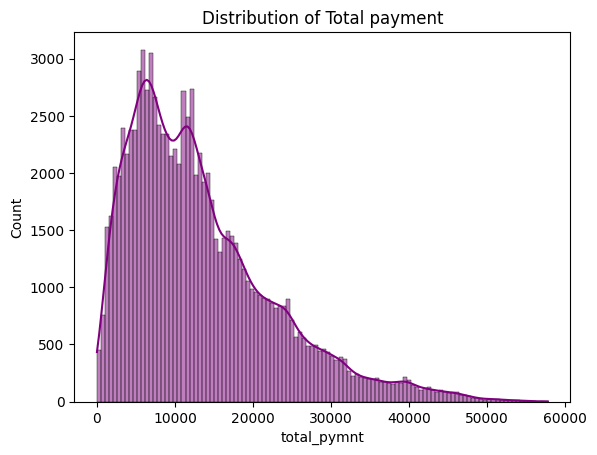

In [13]:
sns.histplot(data = df, x ="total_pymnt" , kde = True,color='purple')
plt.title("Distribution of Total payment")
plt.show()

Distribution of recoveries

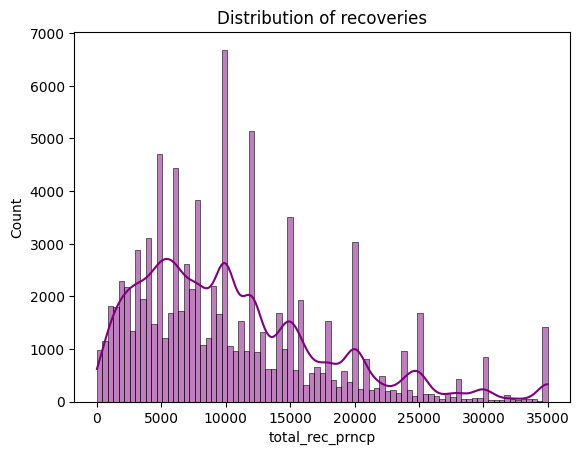

In [24]:
sns.histplot(data = df, x ="total_rec_prncp" , kde = True,color='purple')
plt.title("Distribution of recoveries")
plt.show()

Countplot

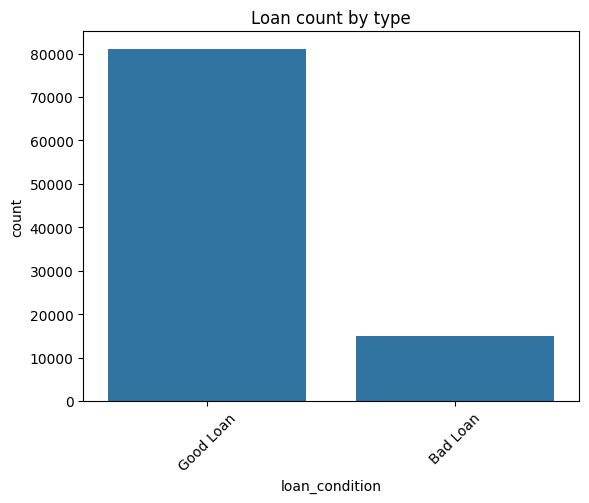

In [5]:
sns.countplot(data = df , x = 'loan_condition')
plt.xticks(rotation = 45)
plt.title('Loan count by type')
plt.show()

Region count plot

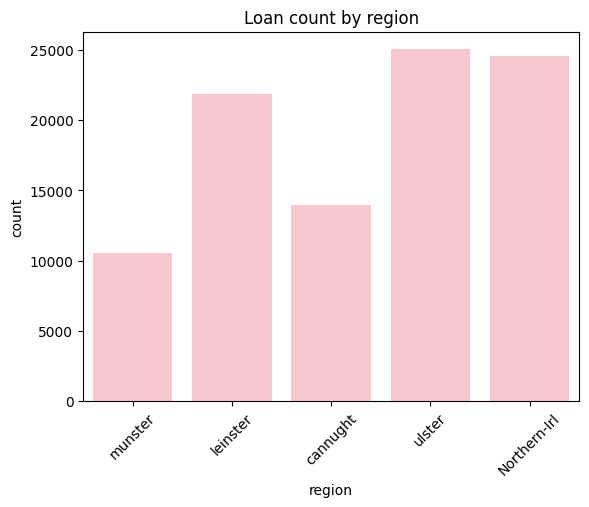

In [9]:
sns.countplot(data = df , x = 'region',color='pink')
plt.xticks(rotation = 45)
plt.title('Loan count by region')
plt.show()


Pie chart - Loan purpose distribution

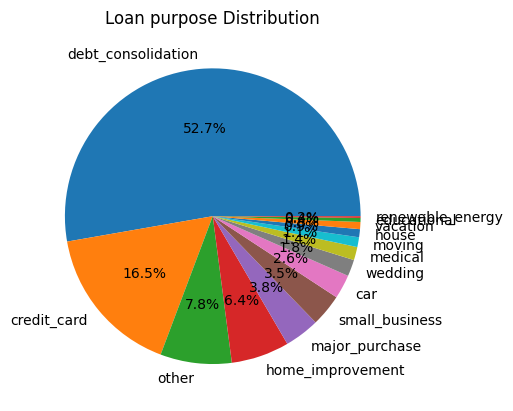

In [22]:
plt.pie(df['purpose'].value_counts() , labels = df['purpose'].value_counts().index,autopct = '%1.1f%%')
plt.title('Loan purpose Distribution')
plt.show()

Pie chart - Grade distribution

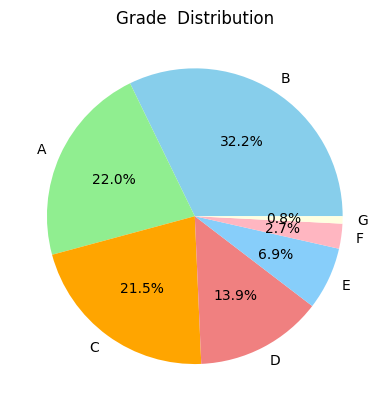

In [21]:
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow']
plt.pie(df['grade'].value_counts() , labels = df['grade'].value_counts().index,autopct = '%1.1f%%', colors=colors)
plt.title('Grade  Distribution')
plt.show()

Correlation heatmap -> Coorelation btw numeric variables

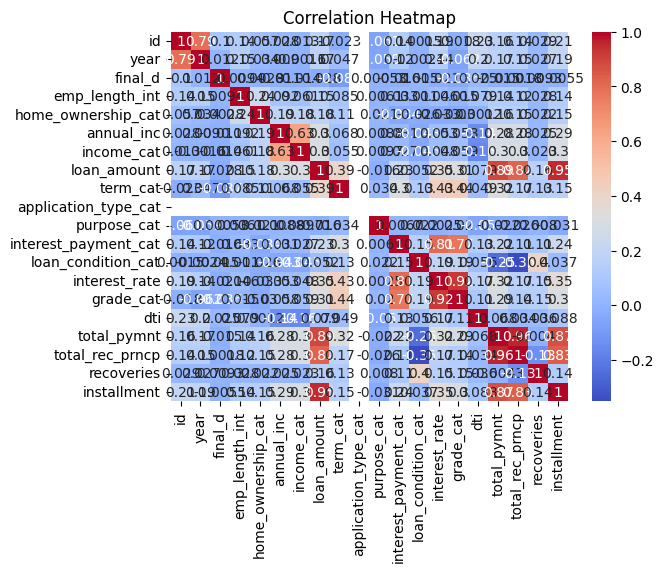

In [23]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
corr = numeric_df.corr()

# Plot correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Time series analysis of loan amount





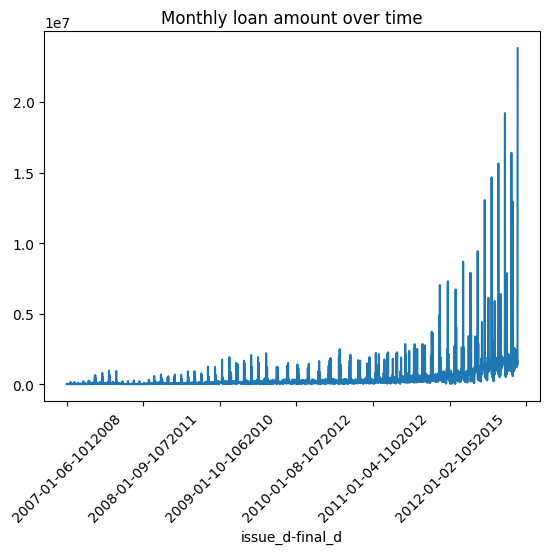

In [24]:
df['issue_d-final_d'] = df['issue_d'].astype(str)+ '-' +df['final_d'].astype(str)
df['loan_amount']=df['loan_amount']
df.groupby('issue_d-final_d')['loan_amount'].sum().plot()
plt.title('Monthly loan amount over time')
plt.xticks(rotation = 45)
plt.show()

recoveries

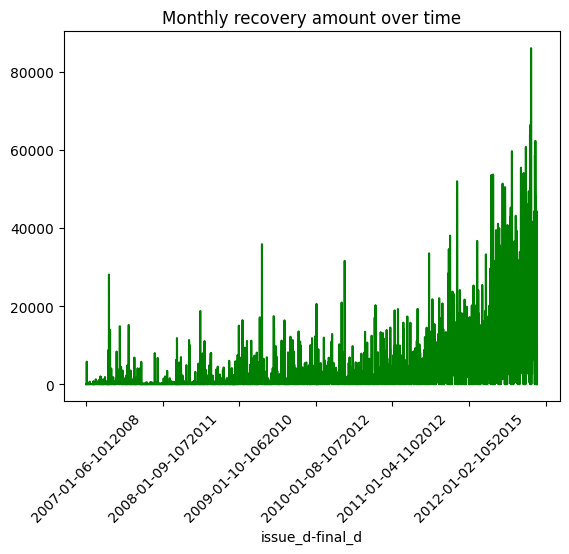

In [12]:
df['issue_d-final_d'] = df['issue_d'].astype(str)+ '-' +df['final_d'].astype(str)
df['recoveries']=df['recoveries']
df.groupby('issue_d-final_d')['recoveries'].sum().plot(color='green')
plt.title('Monthly recovery amount over time')
plt.xticks(rotation = 45)
plt.show()

Scatter plot:home_ownership_cat vs income_cat

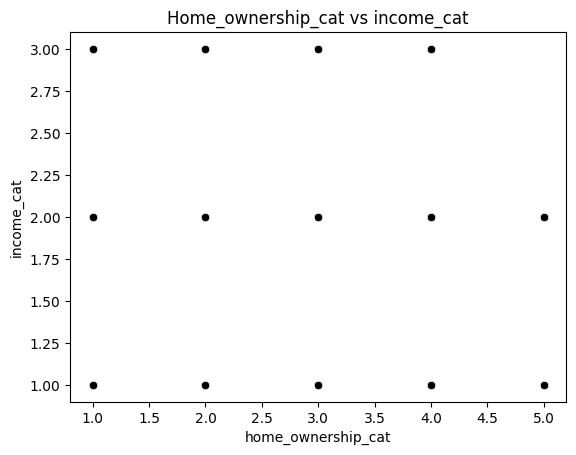

In [14]:
sns.scatterplot(data = df , x = 'home_ownership_cat', y ='income_cat',color='black')
plt.title("Home_ownership_cat vs income_cat")
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='interest_rate', y = 'total_pymnt' , z = 'grade_cat', color ='interest_rate')
fig.update_layout(scene = dict(xaxis = dict(title = 'interest_rate'),yaxis = dict(title = 'Total_pymnt'),zaxis = dict(title = 'grade_cat')))
fig.show()

Box plot: Term and installment

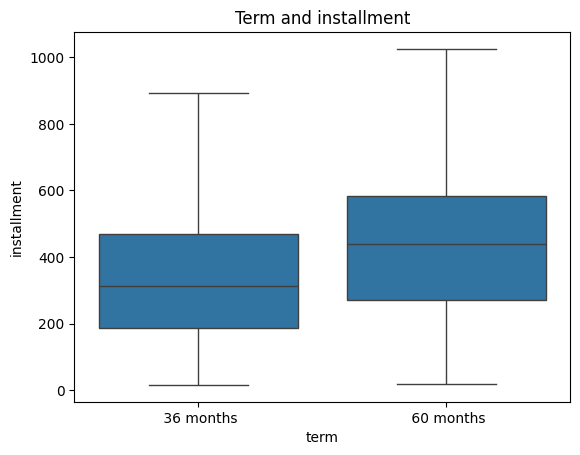

In [19]:
sns.boxplot(data = df, x = 'term' , y='installment', showfliers = False)
plt.title('Term and installment')
plt.show()

Bar plot

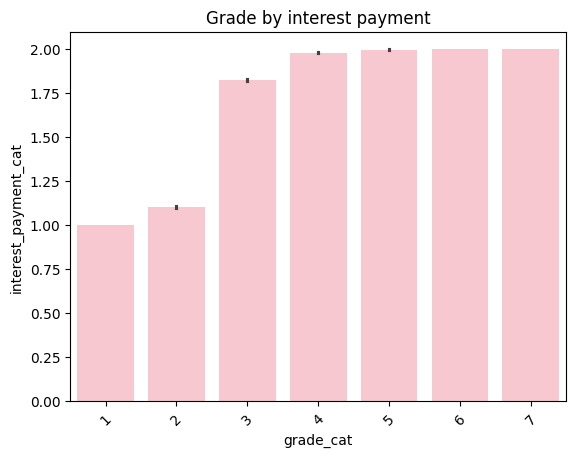

In [28]:
sns.barplot(data = df , x = 'grade_cat' , y='interest_payment_cat' , estimator = np.mean,color='pink')
plt.xticks(rotation = 45)
plt.title('Grade by interest payment')
plt.show()